# Overview of the immigration data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_all_immigrants = pd.read_excel(file_path, sheet_name='Table 2', skiprows=4, header=1)
df_all_immigrants.set_index('Region and country of last residence1', inplace=True)
df_all_immigrants.dropna(how='all', inplace=True)
df_all_immigrants.index = df_all_immigrants.index.map(lambda x: ''.join(filter(str.isalpha, str(x))))
df_all_immigrants.index = df_all_immigrants.index.str.replace(' ', '').str.replace(',', '')

# Print the updated index
print(type(df_all_immigrants.index))
print(df_all_immigrants.head())
print(df_all_immigrants.tail())

<class 'pandas.core.indexes.base.Index'>
                                       1820 to 1829  1830 to 1839  \
Region and country of last residence1                               
Total                                      128502.0      538381.0   
Europe                                      99618.0      422853.0   
AustriaHungary                                  0.0           0.0   
Austria                                         0.0           0.0   
Hungary                                         0.0           0.0   

                                       1840 to 1849  1850 to 1859  \
Region and country of last residence1                               
Total                                     1427337.0     2814554.0   
Europe                                    1369423.0     2622617.0   
AustriaHungary                                  0.0           0.0   
Austria                                         0.0           0.0   
Hungary                                         0.0          

In [28]:
def plot_immigration_over_time(data, regions):
    # Set the 'Region and country of last residence1' column as the index
    plt.figure(figsize=(10, 6))
    # Convert column names to strings
    data = data.columns.astype(str)

    # Plot a line for each region
    for region in regions:
        plt.plot(df_all_immigrants.columns, df_all_immigrants.loc[region], label=region)

    plt.title('Immigration Over Time')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Immigrants')
    plt.legend()

    # Rotate x-labels
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

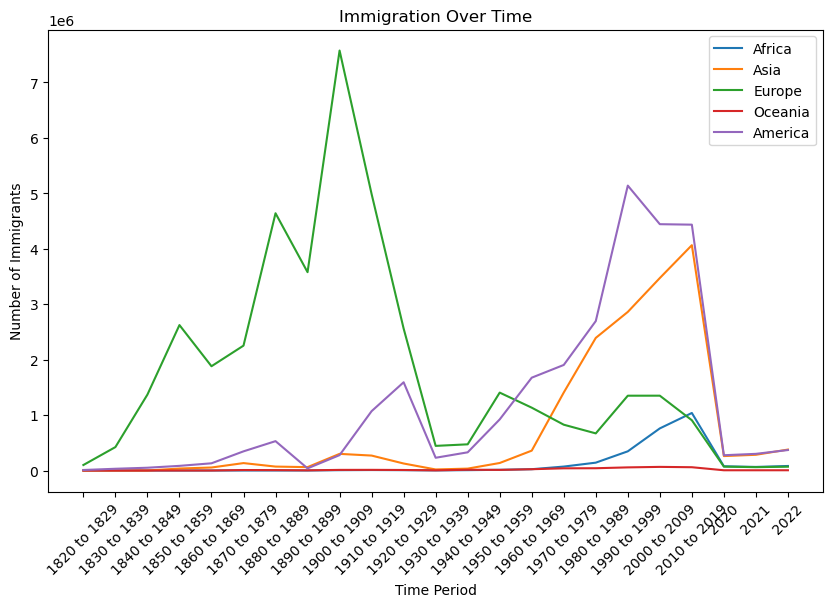

In [29]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'America']
plot_immigration_over_time(df_all_immigrants, continents)

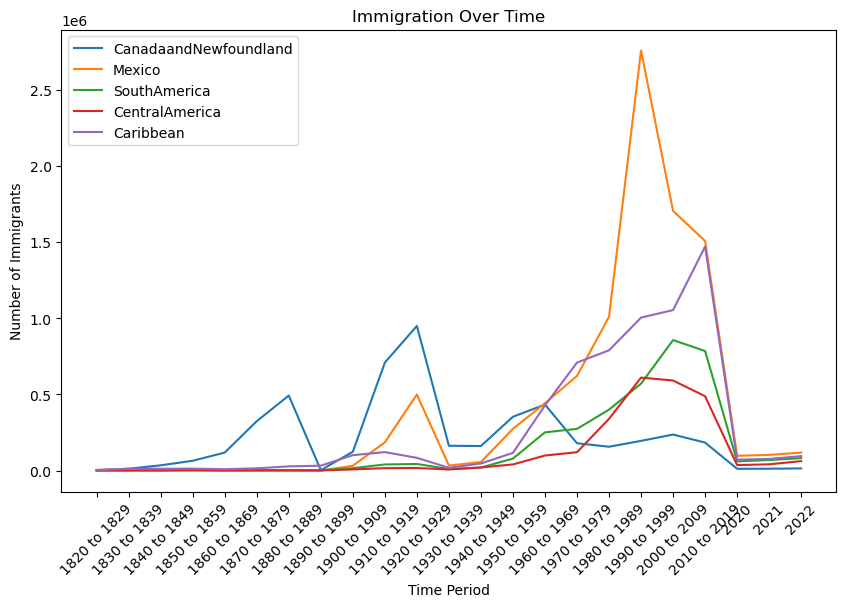

In [31]:
America = ['CanadaandNewfoundland', 'Mexico', 'SouthAmerica', 'CentralAmerica', 'Caribbean']
plot_immigration_over_time(df_all_immigrants, America)

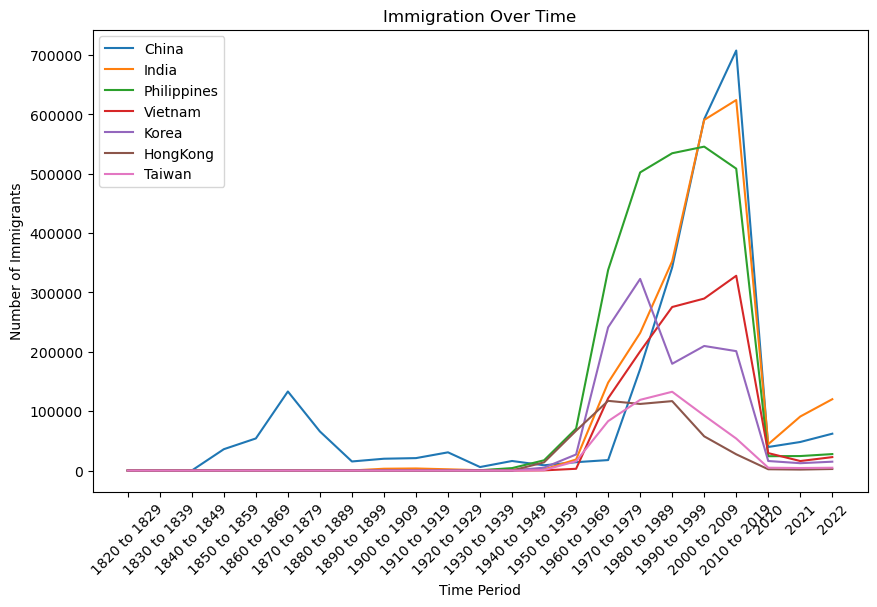

In [35]:
Asia = ['China', 'India', 'Philippines', 'Vietnam', 'Korea', 'HongKong', 'Taiwan']
plot_immigration_over_time(df_all_immigrants, Asia)

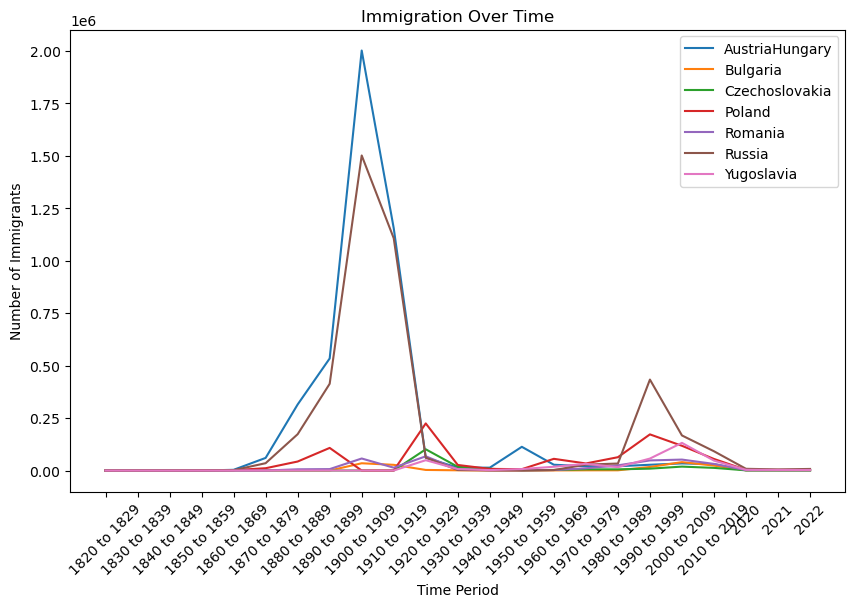

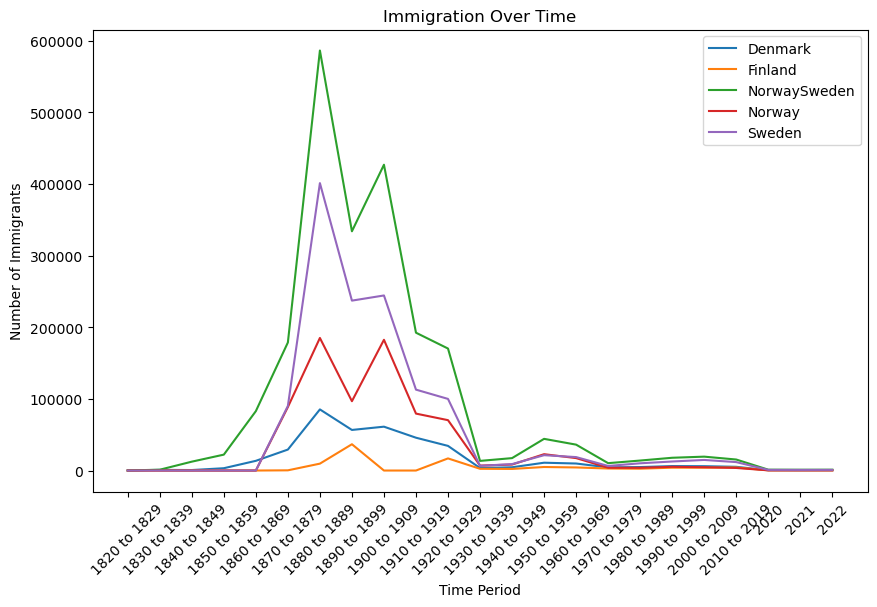

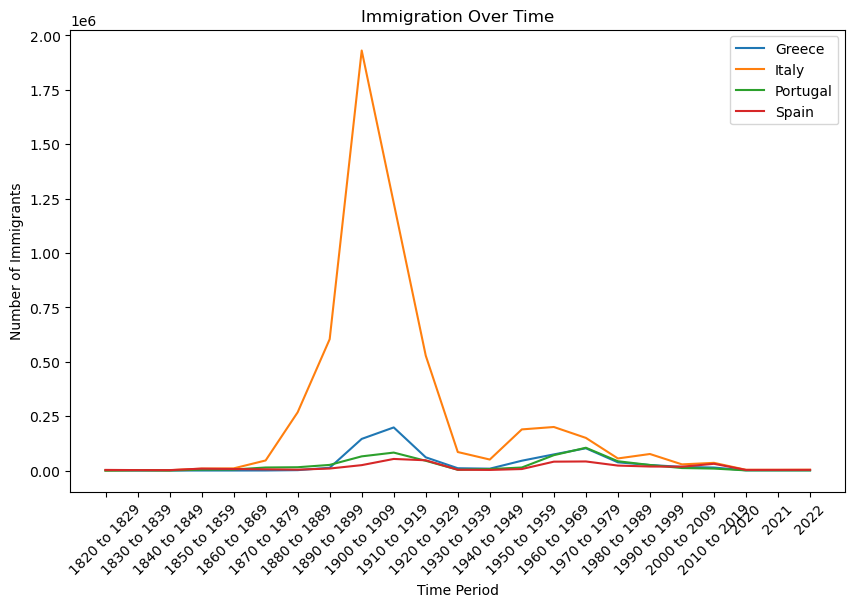

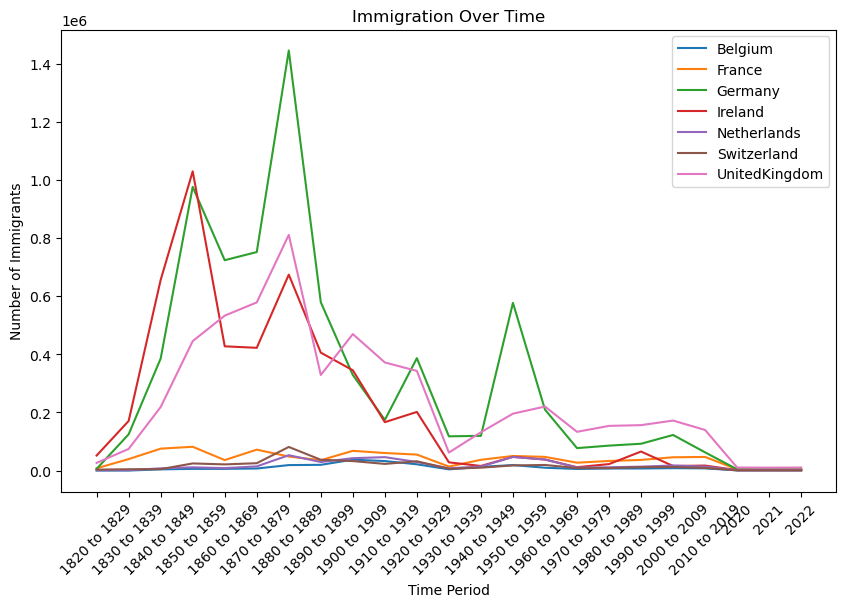

In [38]:
EasternEurope = ["AustriaHungary", "Bulgaria", "Czechoslovakia", "Poland", "Romania", "Russia", "Yugoslavia"]
NorthernEurope = ["Denmark", "Finland", "NorwaySweden", "Norway", "Sweden"]
SouthernEurope = ["Greece", "Italy", "Portugal", "Spain"]
WesternEurope = ["Belgium", "France", "Germany", "Ireland", "Netherlands", "Switzerland", "UnitedKingdom"]
plot_immigration_over_time(df_all_immigrants, EasternEurope)
plot_immigration_over_time(df_all_immigrants, NorthernEurope)
plot_immigration_over_time(df_all_immigrants, SouthernEurope)
plot_immigration_over_time(df_all_immigrants, WesternEurope)

# Green card type

## Overview by year

In [155]:
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_type = pd.read_excel(file_path, sheet_name='Table 6', skiprows=4, header=1)
df_type.set_index('Type and class of admission', inplace=True)
df_type.dropna(how='all', inplace=True)
# Print the updated index

print(df_type.tail())
print(df_type.index)

                                                      2013     2014    2015  \
Type and class of admission                                                   
Certain Iraqis and Afghans employed by U.S. Gov...  2188.0  11868.0  7021.0   
Cancellation of removal                                0.0      0.0     0.0   
Victims of human trafficking                           0.0      0.0     0.0   
Victims of crimes and their immediate relatives       44.0     50.0    26.0   
Other                                                411.0    534.0   521.0   

                                                       2016     2017     2018  \
Type and class of admission                                                     
Certain Iraqis and Afghans employed by U.S. Gov...  12135.0  19143.0  10265.0   
Cancellation of removal                                 0.0      0.0      0.0   
Victims of human trafficking                            0.0      0.0      0.0   
Victims of crimes and their immediate rel

## Overview by region (fiscal 2022)

In [156]:
df_type_region = pd.read_excel(file_path, sheet_name='Table 10d', skiprows=4, header=1)
df_type_region.set_index('Region and country of birth', inplace=True)
df_type_region.dropna(how='all', inplace=True)
# Print the updated index

print(df_type_region.tail())
print(df_type_region.index)

                              Total Immediate relatives of U.S. citizens  \
Region and country of birth                                                
Yemen                        5648.0                                 2585   
Zambia                        365.0                                  203   
Zimbabwe                     1433.0                                  334   
All other countries1           76.0                                   40   
Unknown                      1392.0                                  620   

                            Family-sponsored preferences  \
Region and country of birth                                
Yemen                                               2093   
Zambia                                                32   
Zimbabwe                                              69   
All other countries1                                  10   
Unknown                                              482   

                            Employment-based p

In [157]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "Unknown"]

In [158]:
def plot_percentage_pie(data, regions, type):
    df = data[type]
    df = df.loc[regions]

    # Create a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(df, labels=df.index, autopct='%1.1f%%')

    # Optionally, you can add a title
    plt.title(type)

    # Display the plot
    plt.show()

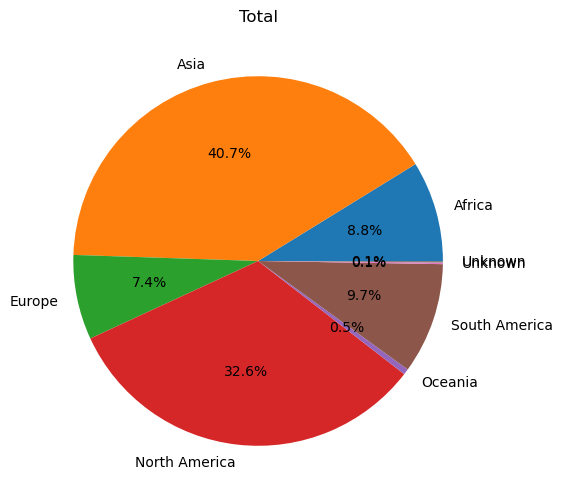

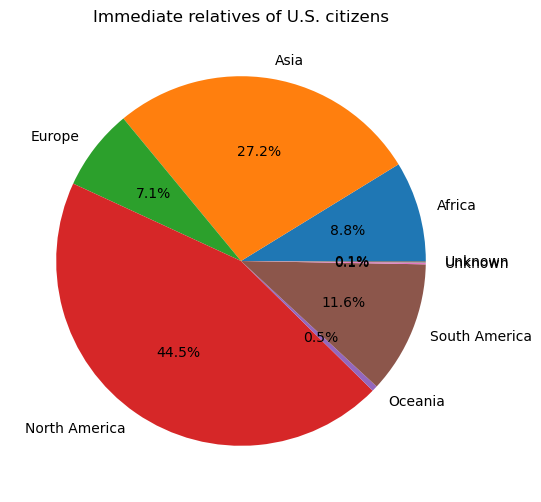

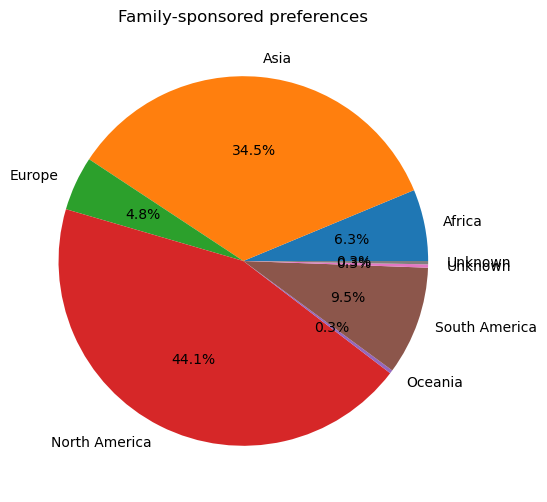

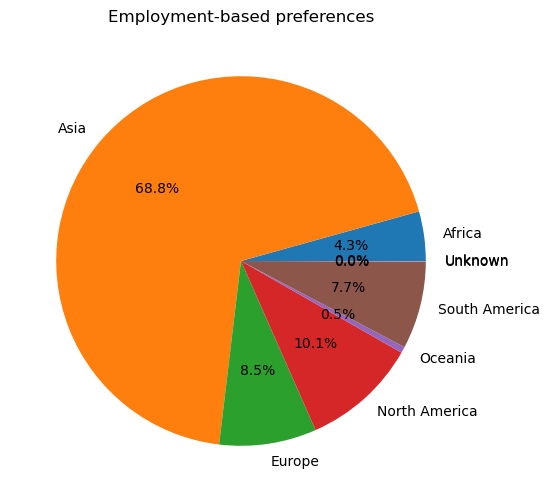

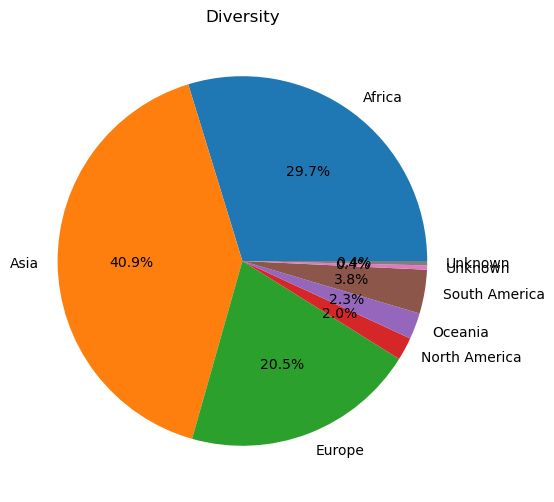

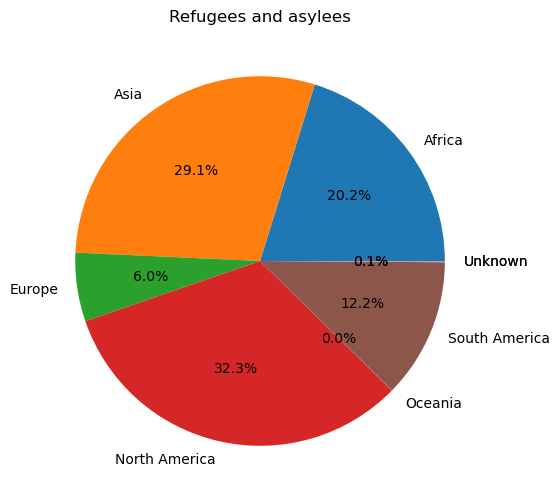

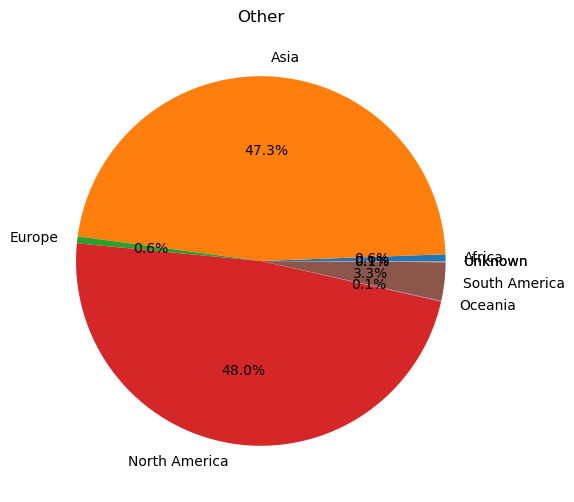

In [159]:
plot_percentage_pie(df_type_region, continents, 'Total')
plot_percentage_pie(df_type_region, continents, "Immediate relatives of U.S. citizens")
plot_percentage_pie(df_type_region, continents, "Family-sponsored preferences")
plot_percentage_pie(df_type_region, continents, "Employment-based preferences")
plot_percentage_pie(df_type_region, continents, "Diversity")
plot_percentage_pie(df_type_region, continents, "Refugees and asylees")
plot_percentage_pie(df_type_region, continents, "Other")

# Receiving states

In [70]:
import numpy as np
df_receiving_states = pd.read_excel(file_path, sheet_name='LPRSuppTable 1d', skiprows=4, header=1)
df_receiving_states.set_index('Region and country of birth', inplace=True)
df_receiving_states.dropna(how='all', inplace=True)
df_receiving_states.replace('D', np.nan, inplace=True)

print(df_receiving_states.head())
print(df_receiving_states.tail())

                                 Total  Alabama  Alaska  Arizona  Arkansas  \
Region and country of birth                                                  
Total                        1018349.0   3747.0   673.0  16984.0    3391.0   
Africa                         89571.0    313.0    51.0   1277.0     197.0   
Asia                          414951.0   1934.0   306.0   5032.0    1345.0   
Europe                         75606.0    205.0   103.0    839.0     133.0   
North America                 332672.0    975.0   136.0   9161.0    1527.0   

                             California  Colorado  Connecticut  Delaware  \
Region and country of birth                                                
Total                          182921.0   11410.0      11219.0    2385.0   
Africa                           5405.0    1299.0        788.0     389.0   
Asia                            98105.0    3855.0       3759.0    1025.0   
Europe                          12454.0     848.0       1393.0     152.0 

In [161]:
def plot_states_bar(data, regions):
    df = data.loc[regions].drop('Total').sort_values()

    # Create a bar chart
    plt.figure(figsize=(6, 10))
    plt.barh(df.index, df)

    plt.title(f"States that receive immigrants from {regions} (2013-2022)")
    plt.xlabel('Number of Immigrants')
    plt.ylabel('States')

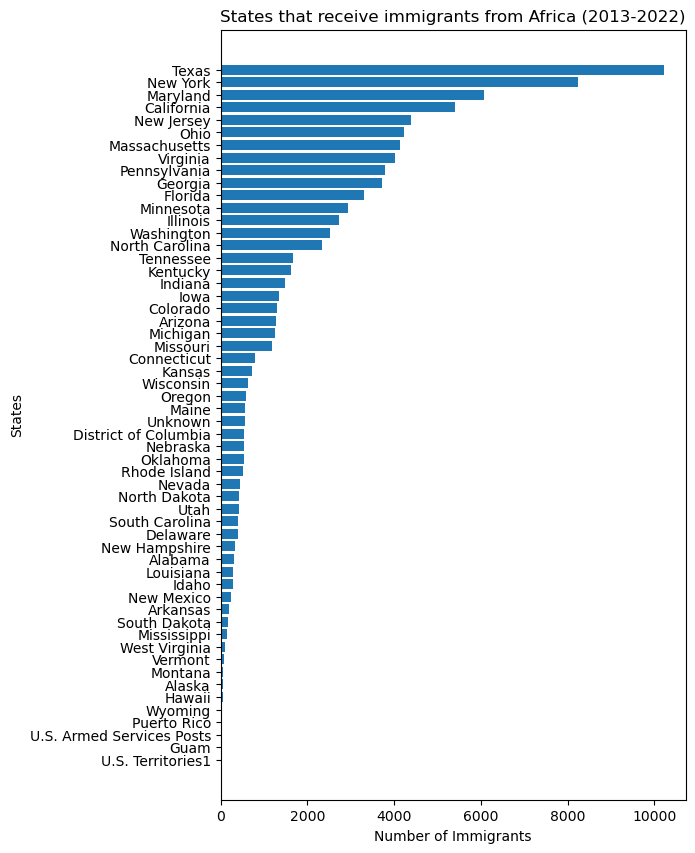

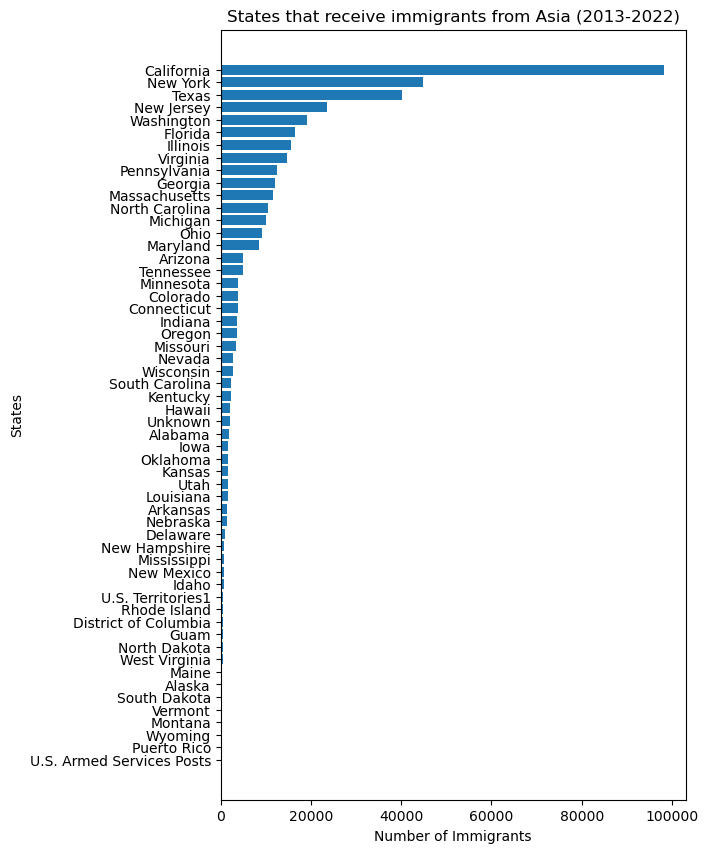

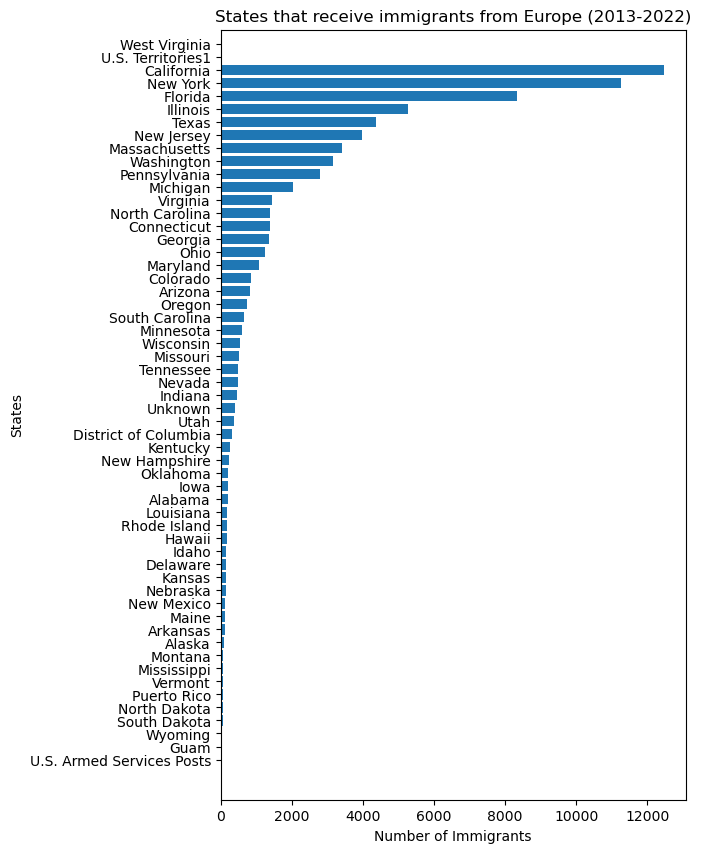

In [162]:
plot_states_bar(df_receiving_states, 'Africa')
plot_states_bar(df_receiving_states, 'Asia')
plot_states_bar(df_receiving_states, 'Europe')


# PERM green card

## prepare data (2008-2023)

### 2023

There're slight differences between the column names of each year's data. 

In [95]:
import os
all_PERM = os.listdir("PERM_data")
file_columns = []
for file in all_PERM:
    if file.endswith(".csv"):
        df = pd.read_csv(f"PERM_data/{file}")
        file_columns.append(df.columns.tolist())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_47557/1828384706.py:6: DtypeWarning: Columns (5,6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"PERM_data/{file}")
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_47557/1828384706.py:6: DtypeWarning: Columns (5,6,16,19,101,102,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"PERM_data/{file}")
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_47557/1828384706.py:6: DtypeWarning: Columns (5,6,16,19,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"PERM_data/{file}")
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_47557/1828384706.py:6: DtypeWarning: Columns (6,16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"PERM_data/{file}")
/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipyk

In [104]:
for columns in file_columns:
    print(columns)

['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'REFILE', 'ORIG_FILE_DATE', 'PREVIOUS_SWA_CASE_NUMBER_STATE', 'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1', 'EMPLOYER_ADDRESS_2', 'EMPLOYER_CITY', 'EMPLOYER_STATE_PROVINCE', 'EMPLOYER_COUNTRY', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'EMPLOYER_NUM_EMPLOYEES', 'EMP_YEAR_COMMENCED_BUSINESS', 'NAICS_CODE', 'FW_OWNERSHIP_INTEREST', 'EMP_CONTACT_NAME', 'EMP_CONTACT_ADDRESS_1', 'EMP_CONTACT_ADDRESS_2', 'EMP_CONTACT_CITY', 'EMP_CONTACT_STATE_PROVINCE', 'EMP_CONTACT_COUNTRY', 'EMP_CONTACT_POSTAL_CODE', 'EMP_CONTACT_PHONE', 'EMP_CONTACT_EMAIL', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_FIRM_NAME', 'AGENT_ATTORNEY_PHONE', 'AGENT_ATTORNEY_PHONE_EXT', 'AGENT_ATTORNEY_ADDRESS_1', 'AGENT_ATTORNEY_ADDRESS_2', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE_PROVINCE', 'AGENT_ATTORNEY_COUNTRY', 'AGENT_ATTORNEY_POSTAL_CODE', 'AGENT_ATTORNEY_EMAIL', 'PW_TRACK_NUMBER', 'PW_SOC_CODE', 'PW_SOC_TITLE', 'PW_SKILL

As we can see, the column names are different. we need to normalize them.

In [109]:
df_PERM_2023 = pd.read_csv("PERM_data/PERM_2023.csv", 
                           usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE_PROVINCE", "WORKSITE_STATE",
                                     "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                                     "MINIMUM_EDUCATION", "MAJOR_FIELD_OF_STUDY", "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                                     "FOREIGN_WORKER_BIRTH_COUNTRY"])

Text(0.5, 1.0, 'Top 10 Countries/regions of Birth of Foreign Workers in 2023')

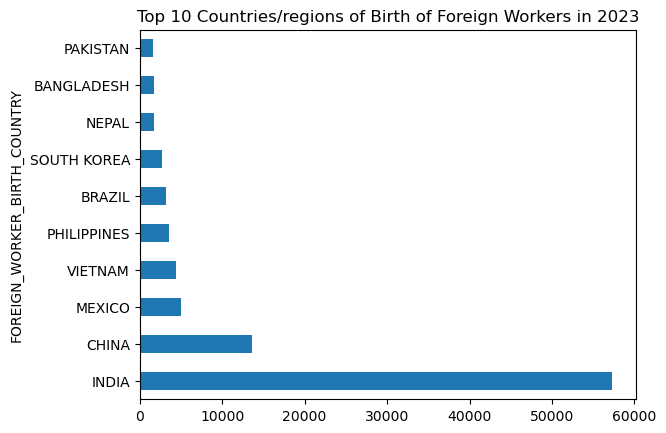

In [181]:
df_PERM_2023.groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers in 2023")

Text(0.5, 1.0, 'Top 10 SOC Titles of Foreign Workers in 2023')

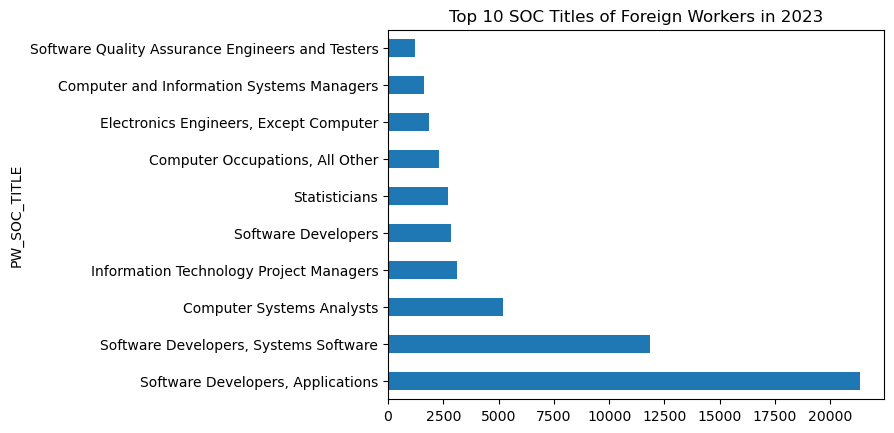

In [174]:
df_PERM_2023.groupby("PW_SOC_TITLE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 SOC Titles of Foreign Workers in 2023")

Text(0.5, 1.0, 'Top 10 States with the Most Foreign Workers (2023)')

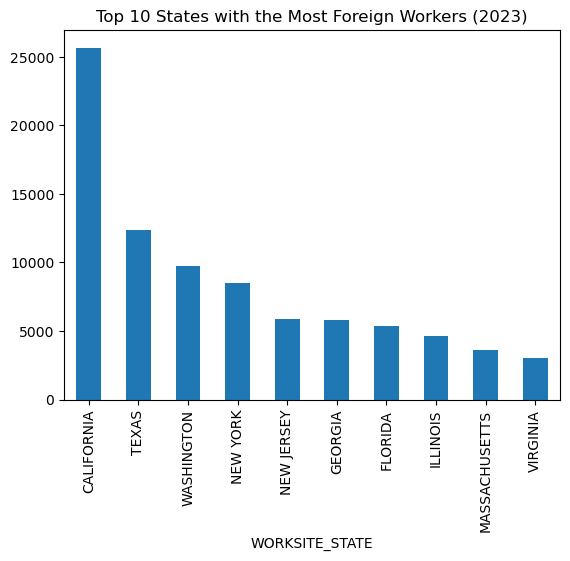

In [163]:
df_PERM_2023.groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers (2023)")

Text(0.5, 1.0, 'Top 10 Major Fields of Study of Foreign Workers (2023)')

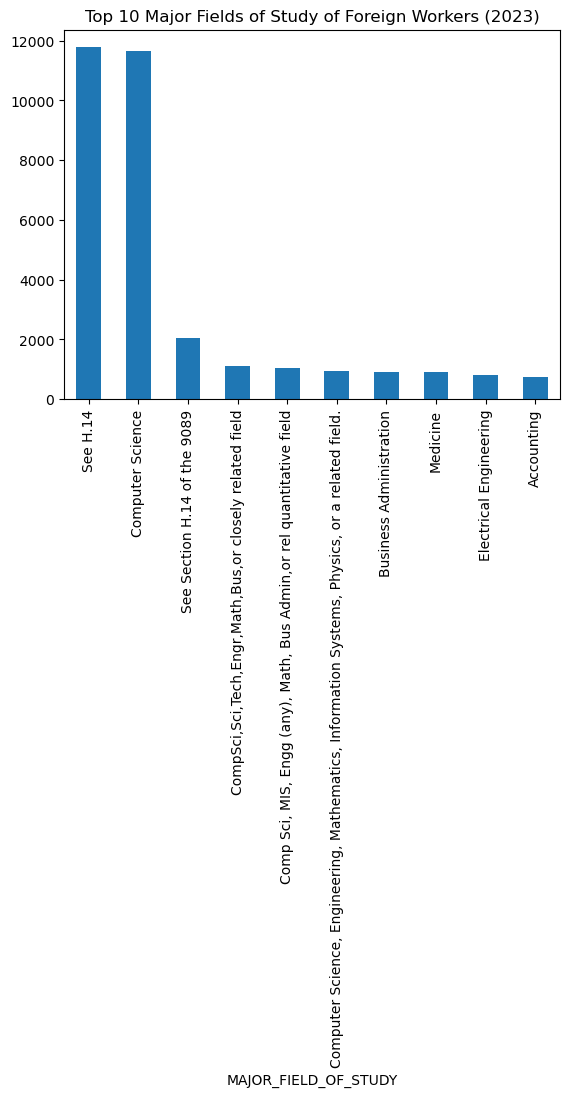

In [168]:
df_PERM_2023.groupby("MAJOR_FIELD_OF_STUDY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Major Fields of Study of Foreign Workers (2023)")

Text(0.5, 1.0, 'Top 10 Education Levels of Foreign Workers (2023)')

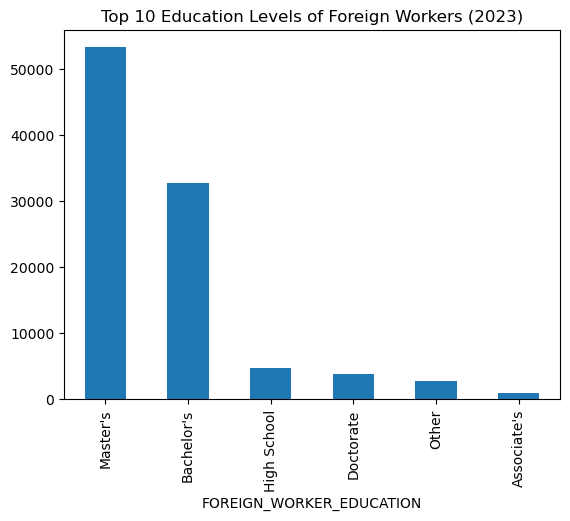

In [169]:
df_PERM_2023.groupby("FOREIGN_WORKER_EDUCATION").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Education Levels of Foreign Workers (2023)")

Text(0.5, 1.0, "Top 10 States with the Most Foreign Workers with Bachelor's Degree (2023)")

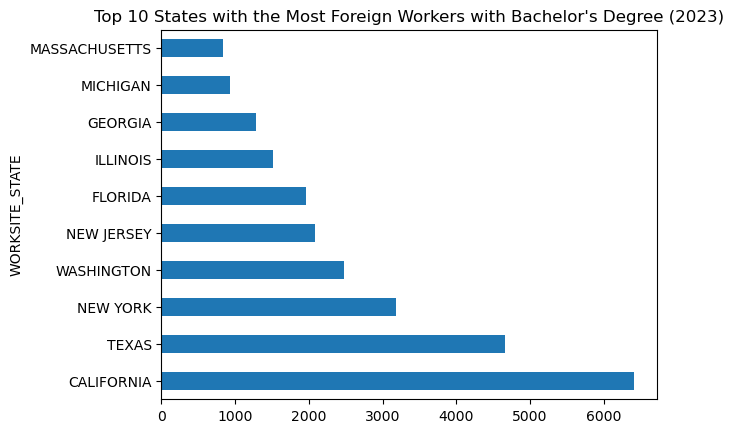

In [175]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Bachelor's"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 States with the Most Foreign Workers with Bachelor's Degree (2023)")

Text(0.5, 1.0, "Top 10 Countries/regions of Birth of Foreign Workers with Master's Degree (2023)")

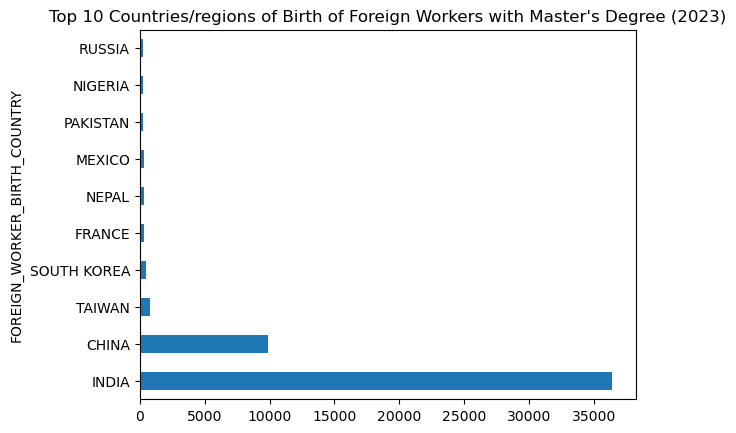

In [177]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Master's"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers with Master's Degree (2023)")

Text(0.5, 1.0, "Top 10 States with the Most Foreign Workers with Master's Degree")

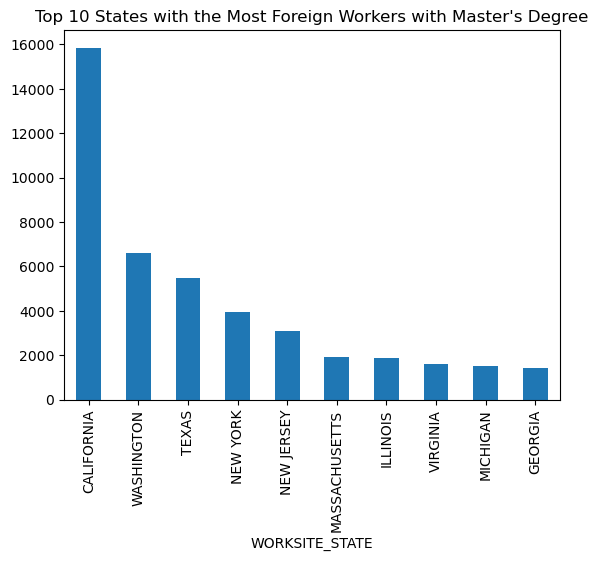

In [130]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Master's"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers with Master's Degree")

Text(0.5, 1.0, 'Top 10 Countries of Birth of Foreign Workers with High School Education')

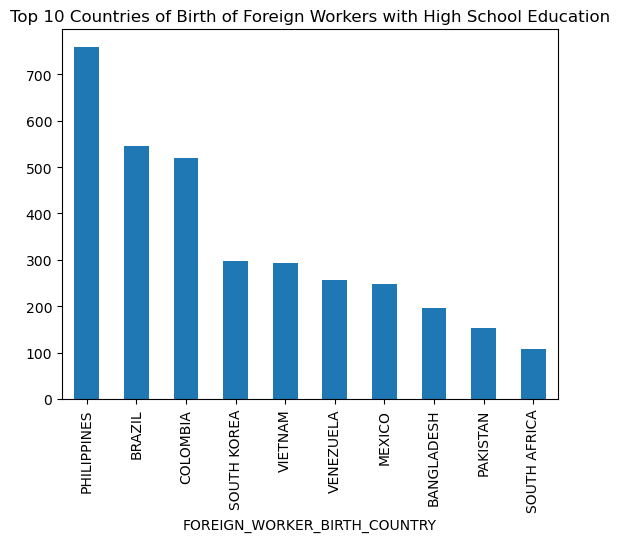

In [131]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries of Birth of Foreign Workers with High School Education")

Text(0.5, 1.0, 'Top 10 States with the Most Foreign Workers with High School Education')

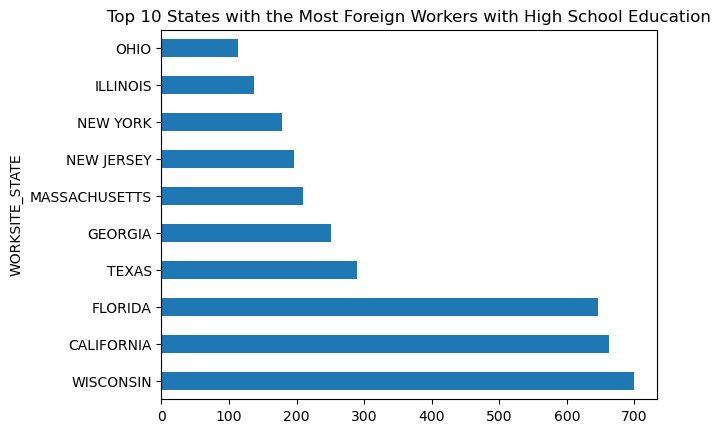

In [178]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 States with the Most Foreign Workers with High School Education")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries of Birth of Foreign Workers with High School Education")
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers with High School Education")

### 2008

In [138]:
df_PERM_2008 = pd.read_csv("PERM_data/PERM_2008.csv", 
                           usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
                                     'PW_JOB_TITLE_9089', 'PW_LEVEL_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089',
                                     'COUNTRY_OF_CITZENSHIP'])

Text(0.5, 1.0, 'Top 10 States with the Most Foreign Workers (2008)')

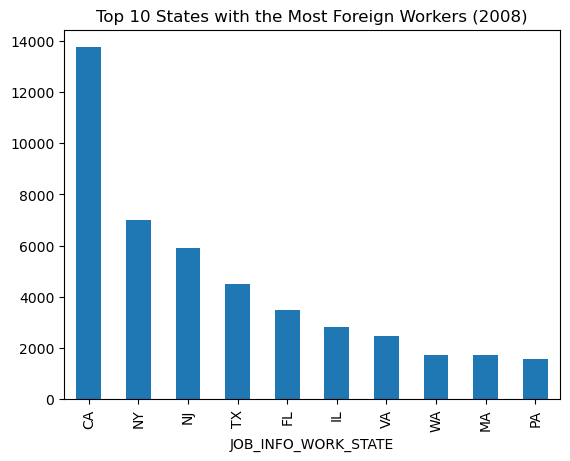

In [165]:
df_PERM_2008.groupby('JOB_INFO_WORK_STATE').size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers (2008)")

Text(0.5, 1.0, 'Top 10 Countries/regions of Citizenship of Foreign Workers in 2008')

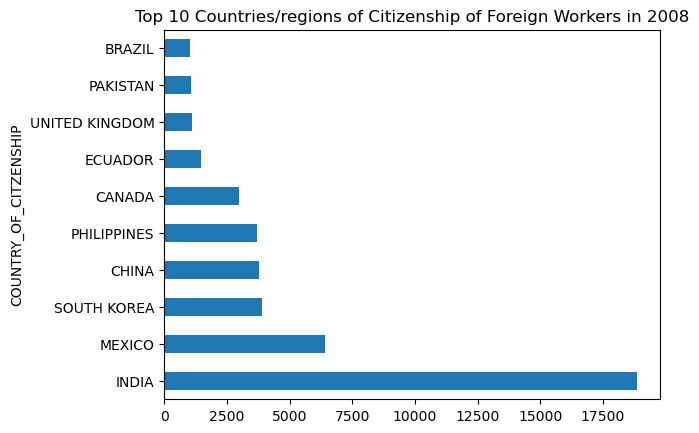

In [180]:
df_PERM_2008.groupby("COUNTRY_OF_CITZENSHIP").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Citizenship of Foreign Workers in 2008")

Text(0.5, 1.0, 'Top 10 Job Titles of Foreign Workers in 2008')

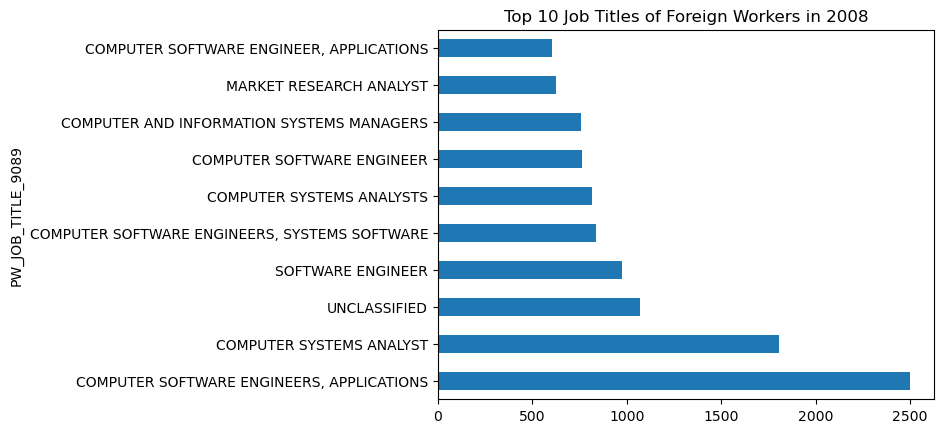

In [172]:
df_PERM_2008.groupby('PW_JOB_TITLE_9089').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Job Titles of Foreign Workers in 2008")

### 2015

In [147]:
# df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv", 
#                            usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
#                                      'PW_SOC_TITLE', 'PW_LEVEL_9089', "PW_AMOUNT_9089",
#                                      "FOREIGN_WORKER_INFO_MAJOR", "FOREIGN_WORKER_INFO_EDUCATION",
#                                      'COUNTRY_OF_CITZENSHIP', 'FW_INFO_BIRTH_COUNTRY'])
df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv")
print(df_PERM_2015.columns.tolist())

/var/folders/nr/c4z83krx45b1bjnl7018t_d80000gn/T/ipykernel_47557/1808949316.py:6: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv")


['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1', 'EMPLOYER_ADDRESS_2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_COUNTRY', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YR_ESTAB', 'FW_OWNERSHIP_INTEREST', 'AGENT_FIRM_NAME', 'AGENT_CITY', 'AGENT_STATE', 'PW_TRACK_NUM', 'PW_SOC_CODE', 'PW_SOC_TITLE', 'PW_LEVEL_9089', 'PW_AMOUNT_9089', 'PW_UNIT_OF_PAY_9089', 'PW_SOURCE_NAME_9089', 'PW_SOURCE_NAME_OTHER_9089', 'PW_DETERM_DATE', 'PW_EXPIRE_DATE', 'WAGE_OFFER_FROM_9089', 'WAGE_OFFER_TO_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE', 'JOB_INFO_WORK_POSTAL_CODE', 'JOB_INFO_JOB_TITLE', 'JOB_INFO_EDUCATION', 'JOB_INFO_EDUCATION_OTHER', 'JOB_INFO_MAJOR', 'JOB_INFO_TRAINING', 'JOB_INFO_TRAINING_NUM_MONTHS', 'JOB_INFO_TRAINING_FIELD', 'JOB_INFO_EXPERIENCE', 'JOB_INFO_EXPERIENCE_NUM_MO

In [149]:
df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv", 
                           usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
                                     'PW_SOC_TITLE', 'PW_LEVEL_9089', "PW_AMOUNT_9089",
                                     "FOREIGN_WORKER_INFO_MAJOR", "FOREIGN_WORKER_INFO_EDUCATION",
                                     'COUNTRY_OF_CITIZENSHIP', 'FW_INFO_BIRTH_COUNTRY'])

Text(0.5, 1.0, 'Top 10 SOC Titles of Foreign Workers in 2015')

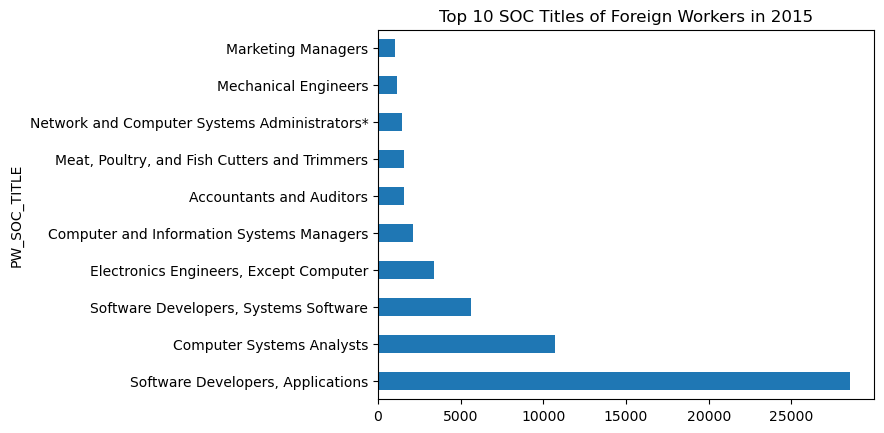

In [173]:
df_PERM_2015.groupby('PW_SOC_TITLE').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 SOC Titles of Foreign Workers in 2015")

Text(0.5, 1.0, 'Top 10 Countries/regions of Birth of Foreign Workers in 2015')

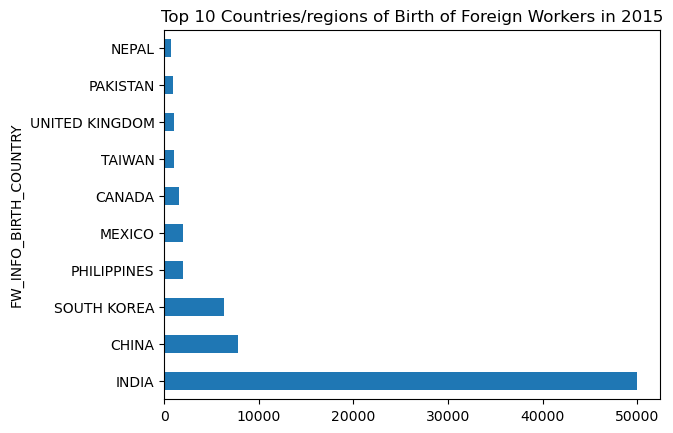

In [182]:
df_PERM_2015.groupby('FW_INFO_BIRTH_COUNTRY').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers in 2015")

Text(0.5, 1.0, 'Top 10 States with the Most Foreign Workers in 2015')

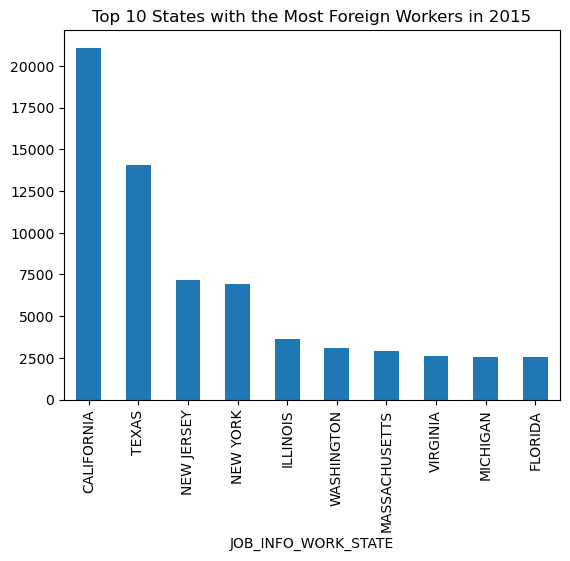

In [166]:
df_PERM_2015.groupby('JOB_INFO_WORK_STATE').size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers in 2015")

Text(0.5, 1.0, 'Top 10 Education Levels of Foreign Workers in 2015')

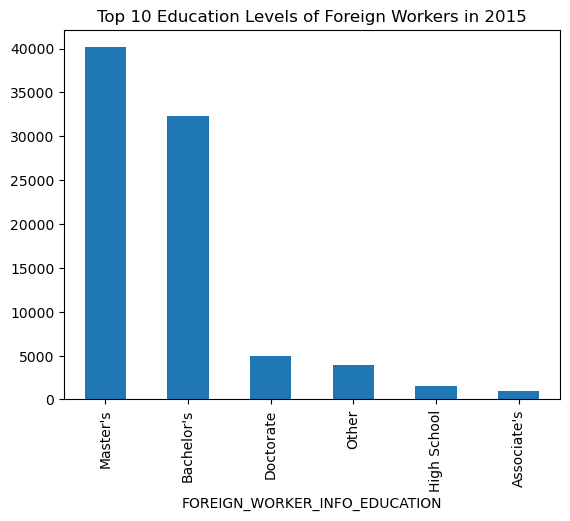

In [153]:
df_PERM_2015.groupby("FOREIGN_WORKER_INFO_EDUCATION").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Education Levels of Foreign Workers in 2015")